In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
train_data = pd.read_csv('Train_data.csv')
test_data = pd.read_csv('Test_data.csv')

In [ ]:
#Explore Data Analysis

In [72]:
train_data.shape

(3102, 18)

In [73]:
train_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


In [74]:
train_data.isna().sum()

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
dtype: int64

In [15]:
train_data['job_type'].unique()

array(['blue-collar', 'management', 'services', 'technician', 'admin.',
       'student', 'retired', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', nan], dtype=object)

In [16]:
train_data['education_level'].unique()

array(['primary', 'tertiary', nan, 'secondary'], dtype=object)

In [17]:
train_data['communication'].unique()

array(['cellular', nan, 'telephone'], dtype=object)

In [20]:
train_data['Outcome'].unique()

array([nan, 'other', 'failure', 'success'], dtype=object)

In [26]:
train_data['last_contact_day'].unique()

array([13, 15, 16, 29, 14,  7,  9, 26, 21, 19, 20, 24, 25,  2, 30,  6, 10,
       17, 28,  3, 27, 23, 11, 18,  8, 22,  1,  5, 12,  4, 31],
      dtype=int64)

In [51]:
train_data['days_passed'].value_counts()

-1      2219
 92       30
 182      22
 91       19
 183      18
        ... 
 7         1
 854       1
 842       1
 690       1
 0         1
Name: days_passed, Length: 321, dtype: int64

In [63]:
train_data['Outcome'].isna().value_counts()

True     2351
False     751
Name: Outcome, dtype: int64

In [62]:
train_data['Outcome'].value_counts()

failure    309
success    299
other      143
Name: Outcome, dtype: int64

In [65]:
train_data['communication'].value_counts()

cellular     2397
telephone     162
Name: communication, dtype: int64

<AxesSubplot:>

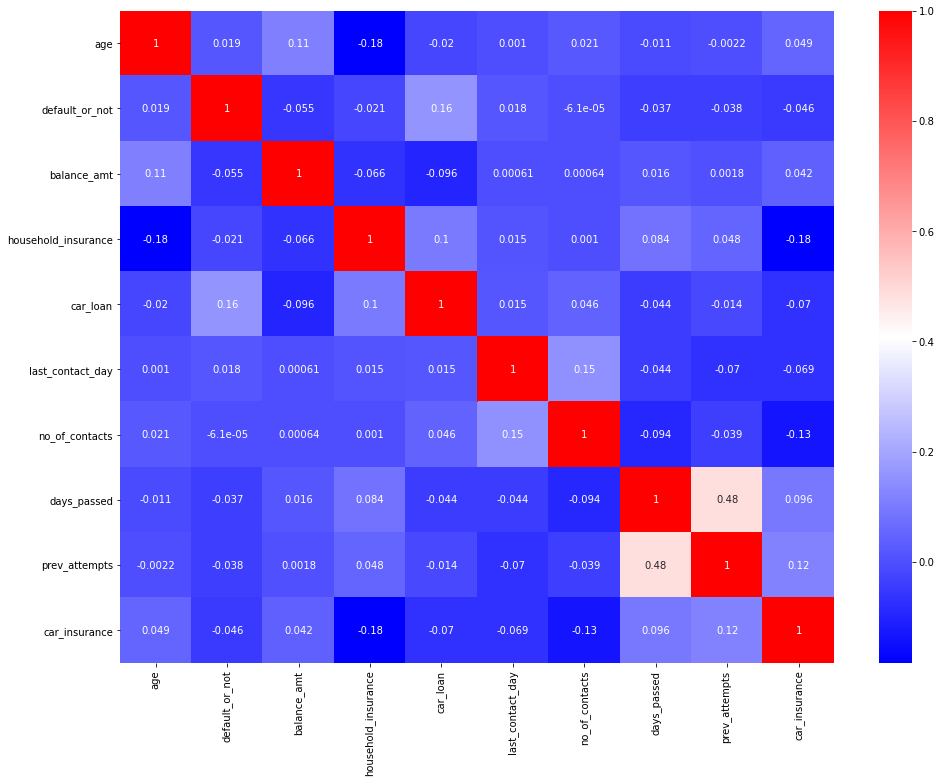

In [50]:
plt.figure(figsize=(16, 12))
sns.heatmap(train_data.corr(), cmap='bwr', annot=True)

In [53]:
test_data['Outcome'].value_counts()

success    112
failure     96
other       32
Name: Outcome, dtype: int64

In [68]:
test_data['Outcome'].isna().sum()

695

<AxesSubplot:xlabel='Outcome'>

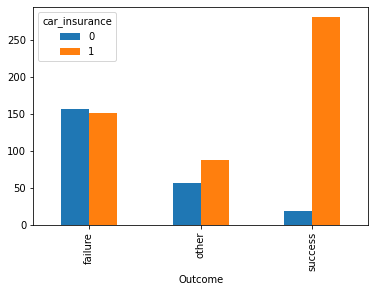

In [64]:
pd.crosstab(train_data.job_type,train_data.car_insurance).plot(kind='bar')

<AxesSubplot:xlabel='job_type'>

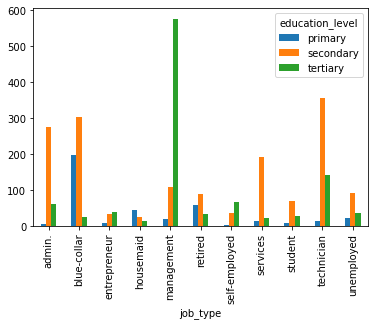

In [79]:
pd.crosstab(train_data.job_type,train_data.education_level).plot(kind='bar')

In [ ]:
# Data Pre-Process

In [75]:
train_data.Outcome.fillna("other", inplace=True)

In [77]:
train_data.isna().sum()

age                      0
job_type                11
marital_status           0
education_level        113
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
communication          543
last_contact_day         0
last_contact_month       0
no_of_contacts           0
days_passed              0
prev_attempts            0
Outcome                  0
call_start               0
call_end                 0
car_insurance            0
dtype: int64

In [80]:
del train_data['communication']

In [81]:
from sklearn.impute import SimpleImputer

In [82]:
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(train_data[['job_type']])
train_data['job_type'] = mode_imputer.transform(train_data[['job_type']]).ravel()

In [83]:
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(train_data[['education_level']])
train_data['education_level'] = mode_imputer.transform(train_data[['education_level']]).ravel()

In [84]:
train_data.isna().sum()

age                    0
job_type               0
marital_status         0
education_level        0
default_or_not         0
balance_amt            0
household_insurance    0
car_loan               0
last_contact_day       0
last_contact_month     0
no_of_contacts         0
days_passed            0
prev_attempts          0
Outcome                0
call_start             0
call_end               0
car_insurance          0
dtype: int64

In [88]:
del train_data['call_start']
del train_data['call_end']

In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3102 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      3102 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   last_contact_day     3102 non-null   int64  
 9   last_contact_month   3102 non-null   object 
 10  no_of_contacts       3102 non-null   int64  
 11  days_passed          3102 non-null   int64  
 12  prev_attempts        3102 non-null   int64  
 13  Outcome              3102 non-null   object 
 14  car_insurance        3102 non-null   int64  
dtypes: float64(2), int64(8), object(5)
mem

In [90]:
train_data = pd.get_dummies(train_data, columns=['job_type'])
train_data = pd.get_dummies(train_data, columns=['marital_status'])
train_data = pd.get_dummies(train_data, columns=['education_level'])
train_data = pd.get_dummies(train_data, columns=['last_contact_month'])
train_data = pd.get_dummies(train_data, columns=['Outcome'])

In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3102 non-null   float64
 1   default_or_not             3102 non-null   int64  
 2   balance_amt                3102 non-null   float64
 3   household_insurance        3102 non-null   int64  
 4   car_loan                   3102 non-null   int64  
 5   last_contact_day           3102 non-null   int64  
 6   no_of_contacts             3102 non-null   int64  
 7   days_passed                3102 non-null   int64  
 8   prev_attempts              3102 non-null   int64  
 9   car_insurance              3102 non-null   int64  
 10  job_type_admin.            3102 non-null   uint8  
 11  job_type_blue-collar       3102 non-null   uint8  
 12  job_type_entrepreneur      3102 non-null   uint8  
 13  job_type_housemaid         3102 non-null   uint8

In [ ]:
# Building A Model

In [92]:
X = train_data.drop('car_insurance', axis = 1)
y = train_data.car_insurance

In [93]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dtree = DecisionTreeClassifier(random_state=1)

In [96]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [97]:
predictions_train = dtree.predict(X_train)
predictions_test = dtree.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
print('Training', accuracy_score(y_train, predictions_train))
print('Test', accuracy_score(y_test, predictions_test))

Training 1.0
Test 0.6723952738990333


In [127]:
model_improved = DecisionTreeClassifier(random_state = 1, max_depth = 5)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [102]:
predictions_train = model_improved.predict(X_train)
predictions_test = model_improved.predict(X_test)

In [103]:
print('train' , accuracy_score(y_train, predictions_train))
print('test', accuracy_score(y_test, predictions_test))

train 0.6397973284200829
test 0.6305048335123523


In [ ]:
# Predict The Test Set Data

In [104]:
test_data.isna().sum()

age                      0
job_type                 5
marital_status           0
education_level         34
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
communication          165
last_contact_day         0
last_contact_month       0
no_of_contacts           0
days_passed              0
prev_attempts            0
Outcome                695
call_start               0
call_end                 0
dtype: int64

In [107]:
del test_data['call_start']
del test_data['call_end']
del test_data['communication']

In [109]:
test_data.isna().sum()

age                      0
job_type                 5
marital_status           0
education_level         34
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
last_contact_day         0
last_contact_month       0
no_of_contacts           0
days_passed              0
prev_attempts            0
Outcome                695
dtype: int64

In [111]:
test_data.Outcome.fillna("other", inplace=True)

In [112]:
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(test_data[['job_type']])
test_data['job_type'] = mode_imputer.transform(test_data[['job_type']]).ravel()

In [113]:
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(test_data[['education_level']])
test_data['education_level'] = mode_imputer.transform(test_data[['education_level']]).ravel()

In [114]:
test_data.isna().sum()

age                    0
job_type               0
marital_status         0
education_level        0
default_or_not         0
balance_amt            0
household_insurance    0
car_loan               0
last_contact_day       0
last_contact_month     0
no_of_contacts         0
days_passed            0
prev_attempts          0
Outcome                0
dtype: int64

In [115]:
test_data = pd.get_dummies(test_data, columns=['job_type'])
test_data = pd.get_dummies(test_data, columns=['marital_status'])
test_data = pd.get_dummies(test_data, columns=['education_level'])
test_data = pd.get_dummies(test_data, columns=['last_contact_month'])
test_data = pd.get_dummies(test_data, columns=['Outcome'])

In [128]:
Insurance_Predict = model_improved.predict(test_data)

In [129]:
Insurance_Predict

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [130]:
res = pd.DataFrame(Insurance_Predict) 
res.columns = ["prediction"]
res.to_csv("prediction_results2.csv", index = False)

In [131]:
Third_Predict = dtree.predict(test_data)

In [132]:
res = pd.DataFrame(Third_Predict) 
res.columns = ["prediction"]
res.to_csv("prediction_results3.csv", index = False)